In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
movies=pd.read_csv('movies_cleaned.csv')

In [3]:
movies.head()

,color,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,language,content_rating,title_year,...,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Year,GDP Growth Rate
0,Color,178.0,0.0,855.0,1000.0,4834,0.0,English,PG-13,2009.0,...,0,0,0,1,0,0,0,0,2009,-2.5
1,Color,150.0,0.0,464.0,894.0,3218,0.0,English,PG-13,2009.0,...,0,0,0,1,0,0,0,0,2009,-2.5
2,Color,118.0,368.0,988.0,23000.0,27468,0.0,English,PG-13,2009.0,...,0,0,0,1,0,0,0,0,2009,-2.5
3,Color,158.0,776.0,310.0,1000.0,2144,0.0,English,PG-13,2009.0,...,0,0,0,1,0,0,0,0,2009,-2.5
4,Color,96.0,0.0,10000.0,18000.0,48878,0.0,English,PG,2009.0,...,0,0,0,0,0,0,0,0,2009,-2.5


In [4]:
encoder = ce.OneHotEncoder(cols=['color','language','content_rating'],use_cat_names=True)

In [5]:
movies=encoder.fit_transform(movies)

In [6]:
movies.head()

,color_Color,color_ Black and White,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,language_English,language_Dari,...,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Year,GDP Growth Rate
0,1,0,178.0,0.0,855.0,1000.0,4834,0.0,1,0,...,0,0,0,1,0,0,0,0,2009,-2.5
1,1,0,150.0,0.0,464.0,894.0,3218,0.0,1,0,...,0,0,0,1,0,0,0,0,2009,-2.5
2,1,0,118.0,368.0,988.0,23000.0,27468,0.0,1,0,...,0,0,0,1,0,0,0,0,2009,-2.5
3,1,0,158.0,776.0,310.0,1000.0,2144,0.0,1,0,...,0,0,0,1,0,0,0,0,2009,-2.5
4,1,0,96.0,0.0,10000.0,18000.0,48878,0.0,1,0,...,0,0,0,0,0,0,0,0,2009,-2.5


In [7]:
encoder.get_feature_names()

['color_Color',
 'color_ Black and White',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'language_English',
 'language_Dari',
 'language_Spanish',
 'language_Maya',
 'language_Japanese',
 'language_Vietnamese',
 'language_Bosnian',
 'language_None',
 'language_Aramaic',
 'language_Filipino',
 'content_rating_PG-13',
 'content_rating_PG',
 'content_rating_R',
 'content_rating_G',
 'content_rating_Unrated',
 'content_rating_Not Rated',
 'content_rating_NC-17',
 'content_rating_X',
 'content_rating_Approved',
 'content_rating_M',
 'content_rating_Passed',
 'title_year',
 'actor_2_facebook_likes',
 'aspect_ratio',
 'inf_adj_budget',
 'inf_adj_gross',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Musical',
 'Music',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Wes

In [8]:
#movies.pop('title_year')
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
color_Color,2996.0,9.712951e-01,1.670038e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
color_ Black and White,2996.0,2.870494e-02,1.670038e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
duration,2996.0,1.096629e+02,2.213576e+01,37.000000,9.500000e+01,1.060000e+02,1.190000e+02,3.300000e+02
director_facebook_likes,2996.0,9.245567e+02,3.359015e+03,0.000000,1.100000e+01,6.400000e+01,2.430000e+02,2.300000e+04
actor_3_facebook_likes,2996.0,8.438999e+02,2.013989e+03,0.000000,2.337500e+02,4.720000e+02,7.242500e+02,2.300000e+04
actor_1_facebook_likes,2996.0,8.302201e+03,1.677869e+04,0.000000,8.195000e+02,2.000000e+03,1.300000e+04,6.400000e+05
cast_total_facebook_likes,2996.0,1.243552e+04,2.051166e+04,0.000000,2.250250e+03,4.614000e+03,1.694500e+04,6.567300e+05
facenumber_in_poster,2996.0,1.414219e+00,2.128349e+00,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,4.300000e+01
language_English,2996.0,9.953271e-01,6.821007e-02,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
language_Dari,2996.0,3.337784e-04,1.826960e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio', 'inf_adj_budget', 'inf_adj_gross', 'Year', 'GDP Growth Rate']


,color_Color,color_ Black and White,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,language_English,language_Dari,...,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Year,GDP Growth Rate
0,1,0,3.087697,-0.275292,0.005512,-0.435280,-0.370657,-0.664579,1,0,...,0,0,0,1,0,0,0,0,0.613254,-2.711229
1,1,0,1.822565,-0.275292,-0.188662,-0.441598,-0.449454,-0.664579,1,0,...,0,0,0,1,0,0,0,0,0.613254,-2.711229
2,1,0,0.376699,-0.165718,0.071562,0.876127,0.732998,-0.664579,1,0,...,0,0,0,1,0,0,0,0,0.613254,-2.711229
3,1,0,2.184031,-0.044234,-0.265140,-0.435280,-0.501824,-0.664579,1,0,...,0,0,0,1,0,0,0,0,0.613254,-2.711229
4,1,0,-0.617334,-0.275292,4.547009,0.578080,1.776968,-0.664579,1,0,...,0,0,0,0,0,0,0,0,0.613254,-2.711229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,1,0,-1.204717,-0.275292,-0.403694,-0.490001,-0.595201,-0.194652,1,0,...,1,0,0,0,0,0,0,0,-6.714809,1.439487
2992,0,1,-0.075135,-0.095745,-0.280535,0.101205,-0.065414,0.275274,1,0,...,0,0,1,0,0,0,0,0,-4.984572,-1.673550
2993,0,1,-1.295084,-0.272315,-0.407667,-0.458527,-0.566188,0.275274,1,0,...,1,0,1,0,0,0,0,0,-6.918366,3.514845
2994,0,1,-0.933618,-0.268146,-0.396742,-0.458527,-0.557850,0.275274,1,0,...,1,0,1,0,0,0,0,0,-7.121924,-2.001238


In [11]:
scaled_movies_df.describe()

,color_Color,color_ Black and White,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,language_English,language_Dari,...,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Year,GDP Growth Rate
count,2996.000000,2996.000000,2.996000e+03,2.996000e+03,2.996000e+03,2.996000e+03,2.996000e+03,2.996000e+03,2996.000000,2996.000000,...,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2.996000e+03,2.996000e+03
mean,0.971295,0.028705,-2.674763e-16,-2.254909e-17,3.934510e-16,3.959524e-17,-6.988921e-17,-5.942435e-16,0.995327,0.000334,...,0.065421,0.098465,0.227637,0.133511,0.042056,0.289720,0.028371,0.016355,-1.300636e-14,2.419960e-15
std,0.167004,0.167004,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,0.068210,0.018270,...,0.247308,0.297992,0.419377,0.340183,0.200751,0.453708,0.166059,0.126858,1.000167e+00,1.000167e+00
min,0.000000,0.000000,-3.283150e+00,-2.752923e-01,-4.190890e-01,-4.948890e-01,-6.063670e-01,-6.645786e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.529038e+00,-7.681164e+00
25%,1.000000,0.000000,-6.625177e-01,-2.720170e-01,-3.030064e-01,-4.460391e-01,-4.966428e-01,-6.645786e-01,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.045328e-01,-4.174122e-01
50%,1.000000,0.000000,-1.655012e-01,-2.562359e-01,-1.846891e-01,-3.756702e-01,-3.813842e-01,-1.946524e-01,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.043605e-01,7.411992e-02
75%,1.000000,0.000000,4.218818e-01,-2.029376e-01,-5.941930e-02,2.800328e-01,2.198865e-01,2.752739e-01,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.150324e-01,7.294960e-01
max,1.000000,1.000000,9.955561e+00,6.573095e+00,1.100294e+01,3.765511e+01,3.141638e+01,1.954225e+01,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.325704e+00,5.699432e+00


Scaled Dataframe looks fine; it will be used for simple linear regression models later.

## Modeling

In [13]:
movies.pop('title_year')

0       2009.0
1       2009.0
2       2009.0
3       2009.0
4       2009.0
         ...  
2991    1937.0
2992    1954.0
2993    1935.0
2994    1933.0
2995    1929.0
Name: title_year, Length: 2996, dtype: float64

### Random Forest Default

In [14]:
X_train, X_test, y_train, y_test = train_test_split(movies.drop(columns={'inf_adj_gross'}), 
                                                        movies.inf_adj_gross, test_size=0.3,random_state=12)

0.4058736517419753


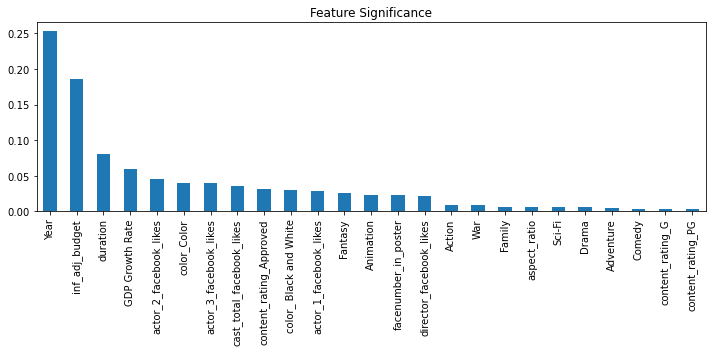

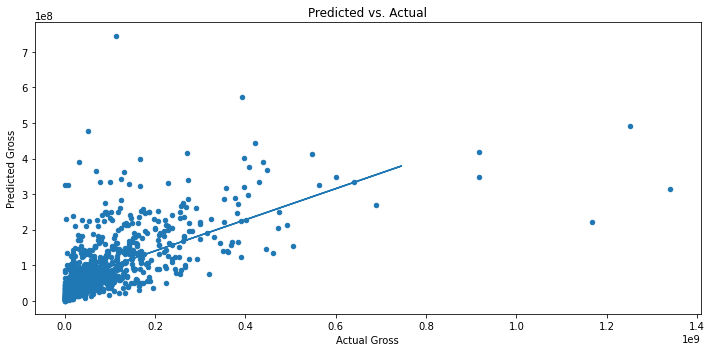

In [15]:
RFR=RandomForestRegressor(random_state=12)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)
y_pred = pd.Series(y_pred)
coef = pd.Series(RFR.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
m,b= np.polyfit(y_test, y_pred, 1)
plt.plot(y_pred,m*y_pred+b)
plt.tight_layout()
print(RFR.score(X_test,y_test))

In [16]:
print(np.mean(movies.inf_adj_gross))
print(mean_absolute_error(y_pred,y_test))

89985722.43940952
52931342.23652675


### Removing Heavy Outliers

In [17]:
RFR=RandomForestRegressor()
RFR.fit(movies.drop(columns={'inf_adj_gross'}),movies.inf_adj_gross)
predicted=RFR.predict(movies.drop(columns={'inf_adj_gross'}))
movies['predicted']=predicted
movies[['predicted','inf_adj_gross']]

,predicted,inf_adj_gross
0,6.751169e+08,9.174514e+08
1,4.028680e+08,4.850533e+08
2,1.928851e+08,1.511823e+08
3,2.431811e+08,2.003927e+08
4,2.221392e+08,1.662982e+08
...,...,...
2991,2.533515e+09,3.323663e+09
2992,1.611805e+08,9.236378e+07
2993,4.451349e+08,5.667394e+07
2994,1.782471e+08,4.578964e+07


In [19]:
movies[['predicted','inf_adj_gross']].describe().T

,count,mean,std,min,25%,50%,75%,max
predicted,2996.0,9.159876e+07,1.254272e+08,271276.576738,2.774338e+07,5.677336e+07,1.144262e+08,2.544458e+09
inf_adj_gross,2996.0,8.998572e+07,1.538945e+08,1027.352530,1.787259e+07,4.852050e+07,1.087816e+08,3.698861e+09


In [22]:
movies[np.abs(movies['predicted']-movies['inf_adj_gross'])>5*movies['inf_adj_gross']]

,color_Color,color_ Black and White,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,language_English,language_Dari,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Year,GDP Growth Rate,predicted
75,1,0,111.0,214.0,3000.0,10000.0,23566,2.0,1,0,...,0,0,0,0,0,0,0,2009,-2.5,1.885679e+07
112,1,0,91.0,7.0,875.0,12000.0,16118,2.0,1,0,...,0,0,0,0,0,0,0,2009,-2.5,7.234576e+06
113,1,0,90.0,0.0,617.0,806.0,3124,2.0,1,0,...,0,1,0,0,0,0,0,2009,-2.5,4.183273e+06
114,1,0,90.0,8.0,495.0,1000.0,3146,1.0,1,0,...,0,0,0,0,0,0,0,2009,-2.5,4.059837e+06
125,1,0,125.0,127.0,798.0,6000.0,8876,6.0,1,0,...,0,1,0,0,0,0,0,2009,-2.5,1.026355e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,0,1,80.0,7.0,21.0,57.0,205,0.0,1,0,...,0,0,1,0,0,0,0,1953,4.7,3.223344e+08
2989,0,1,92.0,0.0,18.0,1000.0,1055,1.0,1,0,...,1,0,0,0,1,0,0,1947,-1.1,6.021666e+07
2990,0,1,87.0,0.0,8.0,309.0,352,1.0,1,0,...,0,0,0,0,0,0,0,1936,12.9,4.378972e+08
2993,0,1,81.0,10.0,23.0,610.0,824,2.0,1,0,...,0,1,0,0,0,0,0,1935,8.9,4.451349e+08


In [23]:
no_outlier_movies=movies[np.abs(movies['predicted']-movies['inf_adj_gross'])<5*movies['inf_adj_gross']]
no_outlier_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2778 entries, 0 to 2994
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color_Color                2778 non-null   int64  
 1   color_ Black and White     2778 non-null   int64  
 2   duration                   2778 non-null   float64
 3   director_facebook_likes    2778 non-null   float64
 4   actor_3_facebook_likes     2778 non-null   float64
 5   actor_1_facebook_likes     2778 non-null   float64
 6   cast_total_facebook_likes  2778 non-null   int64  
 7   facenumber_in_poster       2778 non-null   float64
 8   language_English           2778 non-null   int64  
 9   language_Dari              2778 non-null   int64  
 10  language_Spanish           2778 non-null   int64  
 11  language_Maya              2778 non-null   int64  
 12  language_Japanese          2778 non-null   int64  
 13  language_Vietnamese        2778 non-null   int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(no_outlier_movies.drop(columns={'inf_adj_gross','predicted'}), 
                                                        no_outlier_movies.inf_adj_gross, test_size=0.3, 
                                                        random_state=10)
#X_train, X_test, y_train, y_test = train_test_split(no_outlier_movies[['inf_adj_budget','Year','predicted']], 
                                                        #no_outlier_movies.inf_adj_gross, test_size=0.3, 
                                                        #random_state=10)

0.44400073315929023
0.9004793935540437


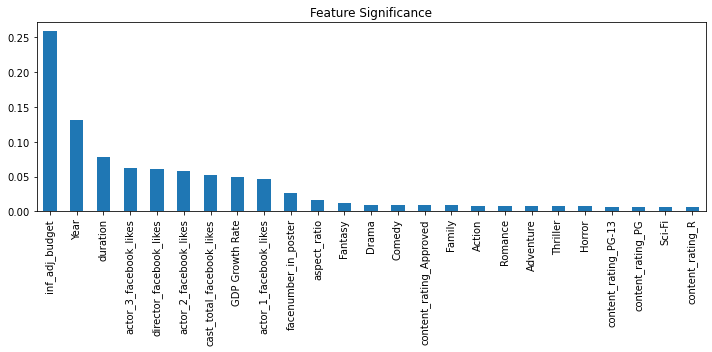

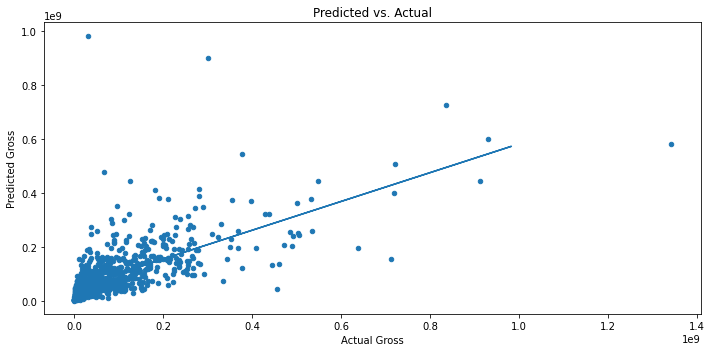

In [25]:
RFR=RandomForestRegressor(random_state=12,criterion='mae')
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)
y_pred = pd.Series(y_pred)
coef = pd.Series(RFR.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
m,b= np.polyfit(y_test, y_pred, 1)
plt.plot(y_pred,m*y_pred+b)
plt.tight_layout()
print(RFR.score(X_test,y_test))
print(RFR.score(X_train,y_train))

In [26]:
print(np.mean(movies.inf_adj_gross))
print(mean_absolute_error(y_pred,y_test))

89985722.43940952
51352507.99567638


Not considering the 218 outliers, the R-squared score went up just a little, and our Mean Absolute Error went down as well. The model predictions are on average off by $51,352,507.

In [27]:
movies[['inf_adj_gross','predicted']].sample(10)

,inf_adj_gross,predicted
2715,1.720640e+08,1.584960e+08
2832,5.620803e+08,4.798782e+08
1855,6.902192e+06,3.081951e+07
1069,2.122293e+07,2.778395e+07
1382,8.067893e+07,7.762854e+07
711,5.588609e+07,7.168500e+07
1668,2.028261e+06,8.545260e+06
2723,1.270000e+08,1.180392e+08
545,3.817988e+07,4.029413e+07
1353,1.303638e+08,1.141903e+08


### Random Forest Random Search CV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
criterion=['mae','mse']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [ ]:
print([int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)])
print([int(x) for x in np.linspace(10, 100, num = 10)])

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [28]:
rfr = RandomForestRegressor(random_state=12)
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,n_iter=20,cv = 5, verbose=2, random_state=12,n_jobs=-1)
rfr_random.fit(X_train, y_train)
rfr_random.best_params_

NameError: name 'random_grid' is not defined

In [29]:
rfr=RandomForestRegressor(max_features='sqrt',random_state=12,min_samples_split=2,n_estimators=2000,min_samples_leaf=1,max_depth=30,criterion='mae',bootstrap=True).fit(X_train,y_train)
print(rfr.score(X_test,y_test))
print(rfr.score(X_train,y_train))

0.5070407239933503
0.905781604219748


In [30]:
y_pred = rfr.predict(X_test)
y_pred = pd.Series(y_pred)
print(mean_absolute_error(y_pred,y_test))

50023804.37700277


This model is slightly better than the default model. The model predictions are on average off by $33,401,385.

## Extreme Gradient Boosting using Bayesian Hyperparameter Optimization

In [31]:
import xgboost as xgb
from skopt import BayesSearchCV

In [91]:
XGBR = xgb.XGBRegressor()
XGBR.fit(X_train,y_train)
opt = BayesSearchCV(XGBR,{"n_estimators":[i for i in range(200,2000)],
                              "max_depth":[i for i in range(3,100)],'reg_lambda':[1,2],
                          'gamma':[0,0.1,0.2,0.3]},n_iter=25,cv=5)
opt.fit(X_train, y_train)
yp = XGBR.predict(X_test)
print(XGBR.score(X_test,y_test))
print(XGBR.score(X_train,y_train))

C:\Users\juang\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\juang\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\juang\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


0.5277047232809933
0.995416880376531


In [92]:
print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

val. score: 0.4083225680320157
test score: 0.5717888187167173


### Linear Regression Model

In [55]:
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # For visualling evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split # For splitting the data.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.

## Modifying Dataset to Increase Predictive Power

In [34]:
new_df=movies.drop(columns={'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','director_facebook_likes','cast_total_facebook_likes','predicted'})
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns={'inf_adj_gross'}),new_df.inf_adj_gross, test_size = 0.25, random_state = 12)

0.2773470122536521
0.9145219365272496
57714007.30205765


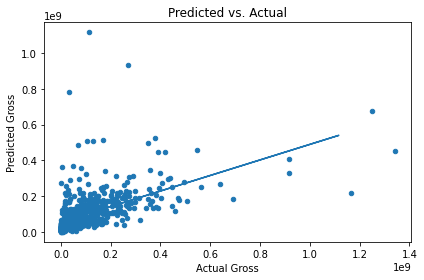

In [35]:
RFRM=RandomForestRegressor(random_state=12,criterion='mae')
RFRM.fit(X_train,y_train)
y_pred = RFRM.predict(X_test)
y_pred = pd.Series(y_pred)
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
m,b= np.polyfit(y_test, y_pred, 1)
plt.plot(y_pred,m*y_pred+b)
plt.tight_layout()
print(RFRM.score(X_test,y_test))
print(RFRM.score(X_train,y_train))
print(mean_absolute_error(y_pred,y_test))

Features regarding number of facebook likes were removed since actors and directors from the past would be put at disadvantage (because they are likelier to be less known these days); but it seems like these features were actually helpful.

In [36]:
#bring back imdb score data from original dataset
orig_movies=pd.read_csv('movie_metadata.csv')
movies['imdb_rating']=0.0
listo=[]
for i in range(len(movies)):
    yes=(movies.duration[i],movies.actor_1_facebook_likes[i],movies.actor_2_facebook_likes[i],movies.director_facebook_likes[i])
    listo.append(yes)
for val in listo:
    for i in range(len(orig_movies)):
        if (val[0]==orig_movies.duration[i]) and (val[1]==orig_movies.actor_1_facebook_likes[i]) and (val[2]==orig_movies.actor_2_facebook_likes[i]) and (val[3]==orig_movies.director_facebook_likes[i]):
            movies.imdb_rating[listo.index(val)]=orig_movies.imdb_score[i]

<ipython-input-36-481cfa339d8e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.imdb_rating[listo.index(val)]=orig_movies.imdb_score[i]


In [39]:
movies.imdb_rating

0       7.9
1       6.0
2       6.6
3       5.8
4       6.8
       ... 
2991    7.7
2992    8.2
2993    7.8
2994    7.7
2995    6.3
Name: imdb_rating, Length: 2996, dtype: float64

In [40]:
#movies.pop('predicted')
rfr=RandomForestRegressor(random_state=12)
rfr.fit(movies.drop(columns={'inf_adj_gross'}),movies.inf_adj_gross)
predicted=rfr.predict(movies.drop(columns={'inf_adj_gross'}))
movies['predicted']=predicted
movies[['predicted','inf_adj_gross']]

,predicted,inf_adj_gross
0,6.569826e+08,9.174514e+08
1,3.803949e+08,4.850533e+08
2,1.744756e+08,1.511823e+08
3,2.239673e+08,2.003927e+08
4,1.869709e+08,1.662982e+08
...,...,...
2991,2.262948e+09,3.323663e+09
2992,2.325559e+08,9.236378e+07
2993,2.417346e+08,5.667394e+07
2994,2.636028e+08,4.578964e+07


In [41]:
print(mean_absolute_error(predicted,movies.inf_adj_gross))

18951971.25366393


In [45]:
movies[np.abs(movies['predicted']-movies['inf_adj_gross'])>5*movies['inf_adj_gross']]

,color_Color,color_ Black and White,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,language_English,language_Dari,...,Romance,Sci-Fi,Sport,Thriller,War,Western,Year,GDP Growth Rate,imdb_rating,predicted
75,1,0,111.0,214.0,3000.0,10000.0,23566,2.0,1,0,...,0,0,0,0,0,0,2009,-2.5,7.3,3.046526e+07
112,1,0,91.0,7.0,875.0,12000.0,16118,2.0,1,0,...,0,0,0,0,0,0,2009,-2.5,5.5,6.389659e+06
113,1,0,90.0,0.0,617.0,806.0,3124,2.0,1,0,...,1,0,0,0,0,0,2009,-2.5,5.9,3.743477e+06
114,1,0,90.0,8.0,495.0,1000.0,3146,1.0,1,0,...,0,0,0,0,0,0,2009,-2.5,4.7,2.542082e+06
125,1,0,125.0,127.0,798.0,6000.0,8876,6.0,1,0,...,1,0,0,0,0,0,2009,-2.5,7.2,8.214578e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,1,0,225.0,126.0,202.0,940.0,1934,6.0,1,0,...,0,0,0,0,0,0,1965,6.5,6.6,4.469577e+08
2959,1,0,152.0,541.0,288.0,773.0,2888,2.0,1,0,...,0,0,0,0,1,1,1965,6.5,6.8,2.322080e+08
2974,1,0,108.0,0.0,105.0,462.0,760,2.0,1,0,...,0,0,0,0,0,0,1972,5.3,6.1,4.296328e+07
2989,0,1,92.0,0.0,18.0,1000.0,1055,1.0,1,0,...,0,0,0,1,0,0,1947,-1.1,7.7,4.585070e+07


In [46]:
no_outlier_movies=movies[np.abs(movies['predicted']-movies['inf_adj_gross'])<5*movies['inf_adj_gross']]
no_outlier_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2790 entries, 0 to 2995
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color_Color                2790 non-null   int64  
 1   color_ Black and White     2790 non-null   int64  
 2   duration                   2790 non-null   float64
 3   director_facebook_likes    2790 non-null   float64
 4   actor_3_facebook_likes     2790 non-null   float64
 5   actor_1_facebook_likes     2790 non-null   float64
 6   cast_total_facebook_likes  2790 non-null   int64  
 7   facenumber_in_poster       2790 non-null   float64
 8   language_English           2790 non-null   int64  
 9   language_Dari              2790 non-null   int64  
 10  language_Spanish           2790 non-null   int64  
 11  language_Maya              2790 non-null   int64  
 12  language_Japanese          2790 non-null   int64  
 13  language_Vietnamese        2790 non-null   int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(movies.drop(columns={'inf_adj_gross','predicted'}), 
                                                        movies.inf_adj_gross, test_size=0.25,random_state=12)

In [48]:
RFR4=RandomForestRegressor(random_state=12)
RFR4.fit(X_train,y_train)
y_pred = RFR4.predict(X_test)
y_pred = pd.Series(y_pred)
print(RFR4.score(X_test,y_test))
print(RFR4.score(X_train,y_train))
print(mean_absolute_error(y_pred,y_test))

0.49769706633504074
0.9174530713189046
50217245.87192722


This model is slightly better than the default model.

In [93]:
XGBR2 = xgb.XGBRegressor(random_state=12)
XGBR2.fit(X_train,y_train)
opt = BayesSearchCV(XGBR2,{"n_estimators":[i for i in range(200,2000)],
                              "max_depth":[i for i in range(3,100)],'reg_lambda':[1,2],
                          'gamma':[0,0.1,0.2,0.3]},n_iter=25,cv=5)
opt.fit(X_train, y_train)
yp = XGBR2.predict(X_test)
print(XGBR2.score(X_test,y_test))
print(XGBR2.score(X_train,y_train))

C:\Users\juang\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\juang\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


0.5277047232809933
0.995416880376531


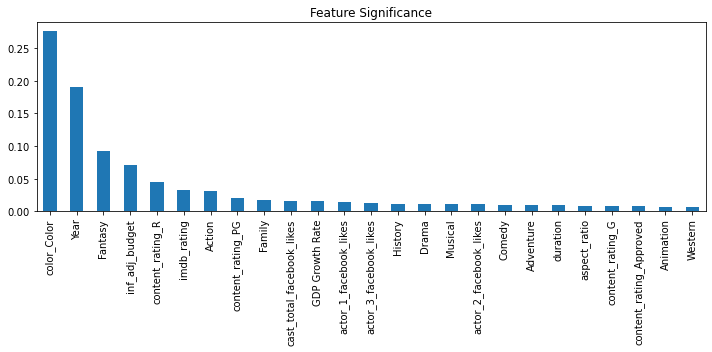

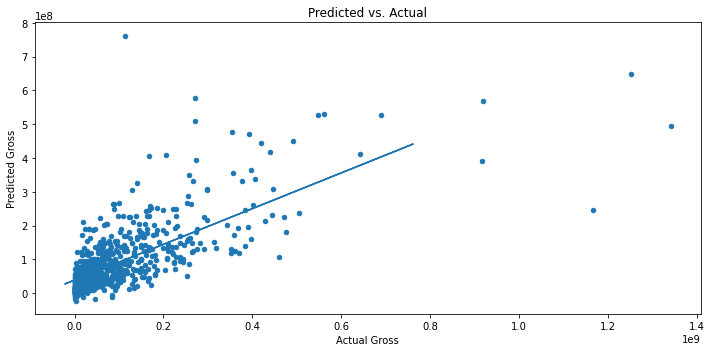

In [94]:
y_pred = XGBR2.predict(X_test)
y_pred = pd.Series(y_pred)
coef = pd.Series(XGBR2.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
m,b= np.polyfit(y_test, y_pred, 1)
plt.plot(y_pred,m*y_pred+b)
plt.tight_layout()

## Other Regression Models

In [52]:
movies.pop('predicted')

0       6.569826e+08
1       3.803949e+08
2       1.744756e+08
3       2.239673e+08
4       1.869709e+08
            ...     
2991    2.262948e+09
2992    2.325559e+08
2993    2.417346e+08
2994    2.636028e+08
2995    2.292703e+08
Name: predicted, Length: 2996, dtype: float64

In [53]:
features=list(movies.columns)
num_feat=[]
scaled_movies_df=movies.copy()

SS_scaler=StandardScaler()
for col in features:
    if movies[col].nunique()!=2: #append only if column is not binarized
        num_feat.append(col)
for col in num_feat:
    scaled_movies_df[col]=SS_scaler.fit_transform(movies[[col]])
print(num_feat)

['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'aspect_ratio', 'inf_adj_budget', 'inf_adj_gross', 'Year', 'GDP Growth Rate', 'imdb_rating']


In [54]:
scaled_movies_df.describe()

,color_Color,color_ Black and White,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,cast_total_facebook_likes,facenumber_in_poster,language_English,language_Dari,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Year,GDP Growth Rate,imdb_rating
count,2996.000000,2996.000000,2.996000e+03,2.996000e+03,2.996000e+03,2.996000e+03,2.996000e+03,2.996000e+03,2996.000000,2996.000000,...,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2996.000000,2.996000e+03,2.996000e+03,2.996000e+03
mean,0.971295,0.028705,-2.674763e-16,-2.254909e-17,3.934510e-16,3.959524e-17,-6.988921e-17,-5.942435e-16,0.995327,0.000334,...,0.098465,0.227637,0.133511,0.042056,0.289720,0.028371,0.016355,-1.300636e-14,2.419960e-15,-6.057613e-16
std,0.167004,0.167004,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,0.068210,0.018270,...,0.297992,0.419377,0.340183,0.200751,0.453708,0.166059,0.126858,1.000167e+00,1.000167e+00,1.000167e+00
min,0.000000,0.000000,-3.283150e+00,-2.752923e-01,-4.190890e-01,-4.948890e-01,-6.063670e-01,-6.645786e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.529038e+00,-7.681164e+00,-4.233115e+00
25%,1.000000,0.000000,-6.625177e-01,-2.720170e-01,-3.030064e-01,-4.460391e-01,-4.966428e-01,-6.645786e-01,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.045328e-01,-4.174122e-01,-3.512441e-01
50%,1.000000,0.000000,-1.655012e-01,-2.562359e-01,-1.846891e-01,-3.756702e-01,-3.813842e-01,-1.946524e-01,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.043605e-01,7.411992e-02,1.935798e-01
75%,1.000000,0.000000,4.218818e-01,-2.029376e-01,-5.941930e-02,2.800328e-01,2.198865e-01,2.752739e-01,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.150324e-01,7.294960e-01,6.021978e-01
max,1.000000,1.000000,9.955561e+00,6.573095e+00,1.100294e+01,3.765511e+01,3.141638e+01,1.954225e+01,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.325704e+00,5.699432e+00,2.100464e+00


In [74]:
from sklearn.linear_model import Lasso, Ridge

In [61]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_movies_df.drop(columns={'inf_adj_gross'}),scaled_movies_df.inf_adj_gross, test_size = 0.25, random_state = 12)

In [85]:
reg= LinearRegression()
reg.fit(X_train2, y_train2)
y_pred=reg.predict(X_test2)

In [86]:
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))
print(mean_absolute_error(y_pred,y_test))

-0.1805419518200837
-11613.635204078191
831927518.263213


:(